# Data Formats

We need to check mistakes in the file 'Students_Performance.txt' such as:
1) ⁠n/a values
2) ⁠typos in column names 
3) inconsistent formatting of variables (Region_Country/Area)
4) ⁠exact duplicates
5) ⁠value displayed as date even tough they are numbers 
6) ⁠swapping data in columns 
7) ⁠changed ae, oe, ue to ä, ö, ü (common mistake in german) 
8) ⁠string value "N/A" in a value column (int) 
9) ⁠some unique identifiers have decimals others dont 
10) ⁠some huge or small values that cant be right

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('Group_5_Students_Performance.txt', sep='\t')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 1. Check NaNs

In [4]:
# Check if there are any NaN values in the DataFrame
has_nan = df.isnull().values.any()
print(f"Does the DataFrame contain NaN values?: {has_nan}")

Does the DataFrame contain NaN values?: False


There are non NaNs

## 2. Check typos

In [5]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'gender': ['female' 'male' 'ma1e' 'Female']
Unique values in column 'race/ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E' 'grouq B']
Unique values in column 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' 'associate¡¥s degree' 'kindergarten']
Unique values in column 'lunch': ['standard' 'free/reduced' 'free\\reduced']
Unique values in column 'test preparation course': ['none' 'completed' 'finished']
Unique values in column 'math score': [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique values in column 'reading score': ['72' '90' '95' '57' '78' '83' '43' '64' '60' '54' '52' '

There are mistakes in columns:
* gender - ma1e, Female/female;
* race - 'grouq B';
* parental level of education - 'associate¡¥s degree'
* lunch - 'free/reduced' 'free\\reduced'
* reading score - '5l'
* writing score - '7O' instead of '70'

## 3. Check formating

In [6]:
# Check types of data in columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   object
 7   writing score                1000 non-null   object
dtypes: int64(1), object(7)
memory usage: 62.6+ KB


We have two columns reading and writing scores with Dtype 'object'

## 4. Check duplicates

In [7]:
print(f"Number of duplicated rows: {df.duplicated().sum()}")

Number of duplicated rows: 0


There are no duplicates.

## 5. Check distribution

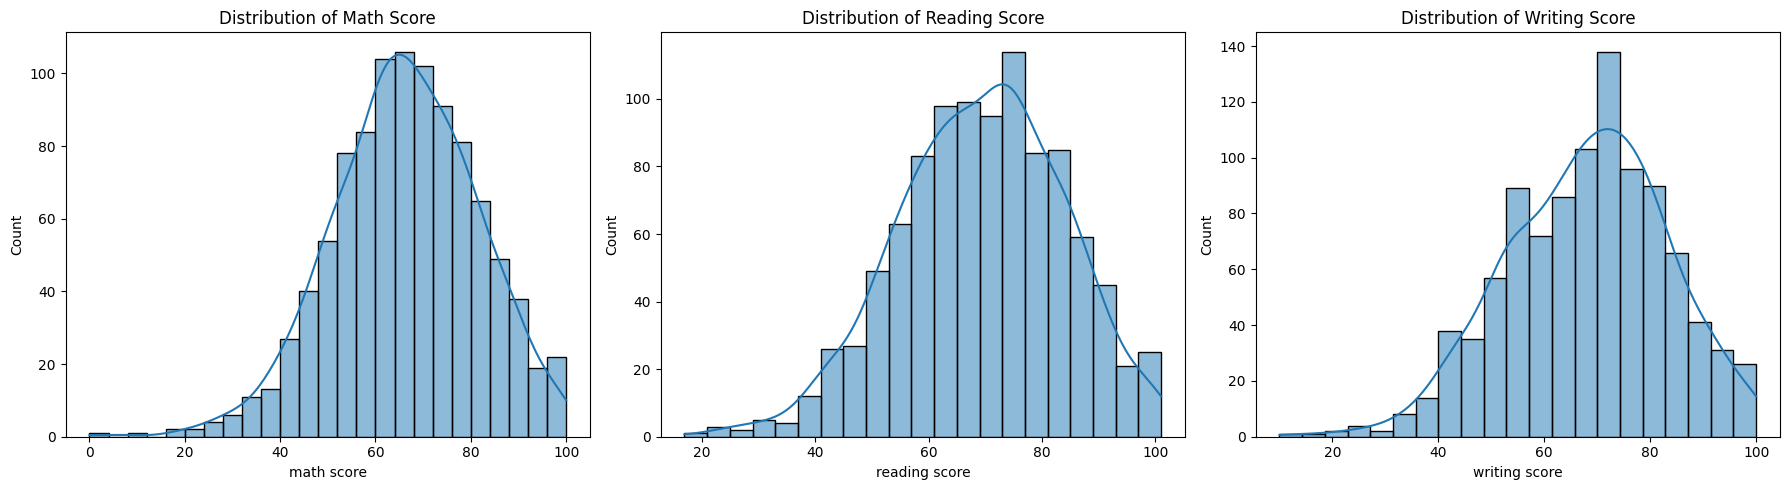

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Solve mistakes in num columns
df['reading score'] = df['reading score'].replace('5l', '51')
df['writing score'] = df['writing score'].replace('7O', '51')

# Convert types in columns
df['reading score'] = df['reading score'].astype(int)
df['writing score'] = df['writing score'].astype(int)

# Set up the figure and subplots
plt.figure(figsize=(18, 5))

# Plot distribution of 'math score'
plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Score')

# Plot distribution of 'reading score'
plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True)
plt.title('Distribution of Reading Score')

# Plot distribution of 'writing score'
plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Score')

# Display all subplots in a single figure
plt.tight_layout()
plt.show()

There are no outliers.

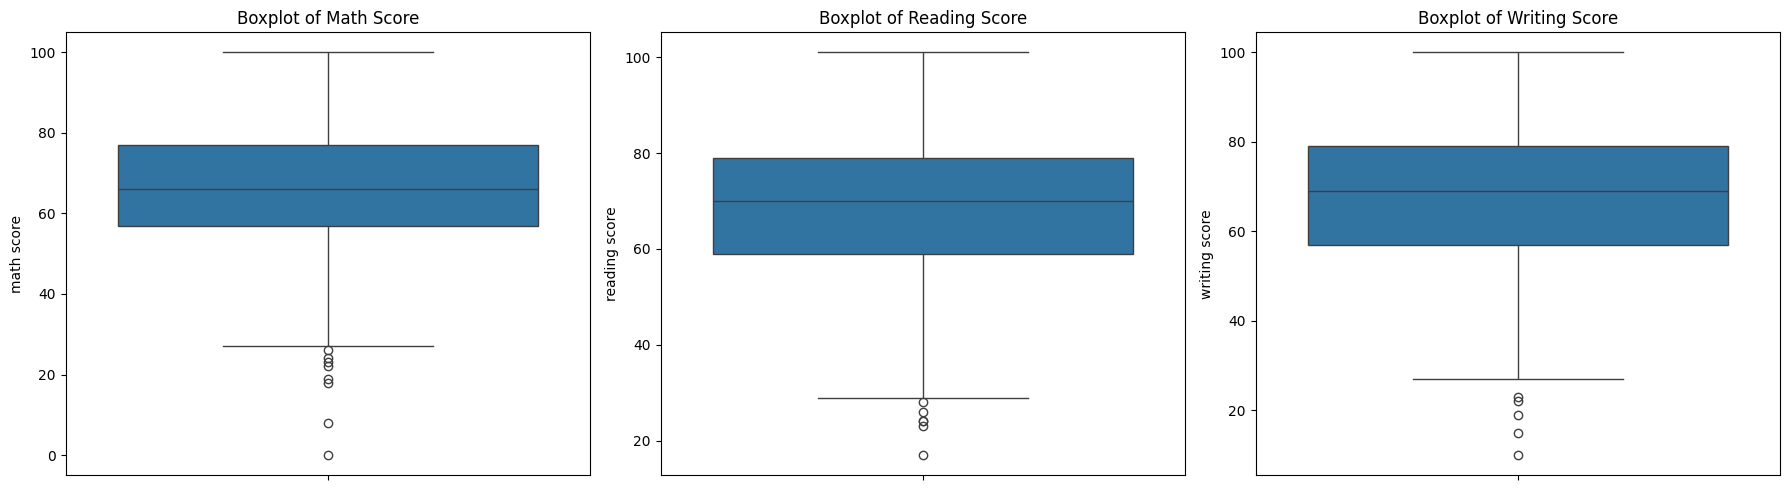

In [12]:

# Set up the figure and subplots
plt.figure(figsize=(18, 5))

# Plot boxplot of 'math score'
plt.subplot(1, 3, 1)
sns.boxplot(y=df['math score'])
plt.title('Boxplot of Math Score')

# Plot boxplot of 'reading score'
plt.subplot(1, 3, 2)
sns.boxplot(y=df['reading score'])
plt.title('Boxplot of Reading Score')

# Plot boxplot of 'writing score'
plt.subplot(1, 3, 3)
sns.boxplot(y=df['writing score'])
plt.title('Boxplot of Writing Score')

# Display all subplots in a single figure
plt.tight_layout()
plt.show()

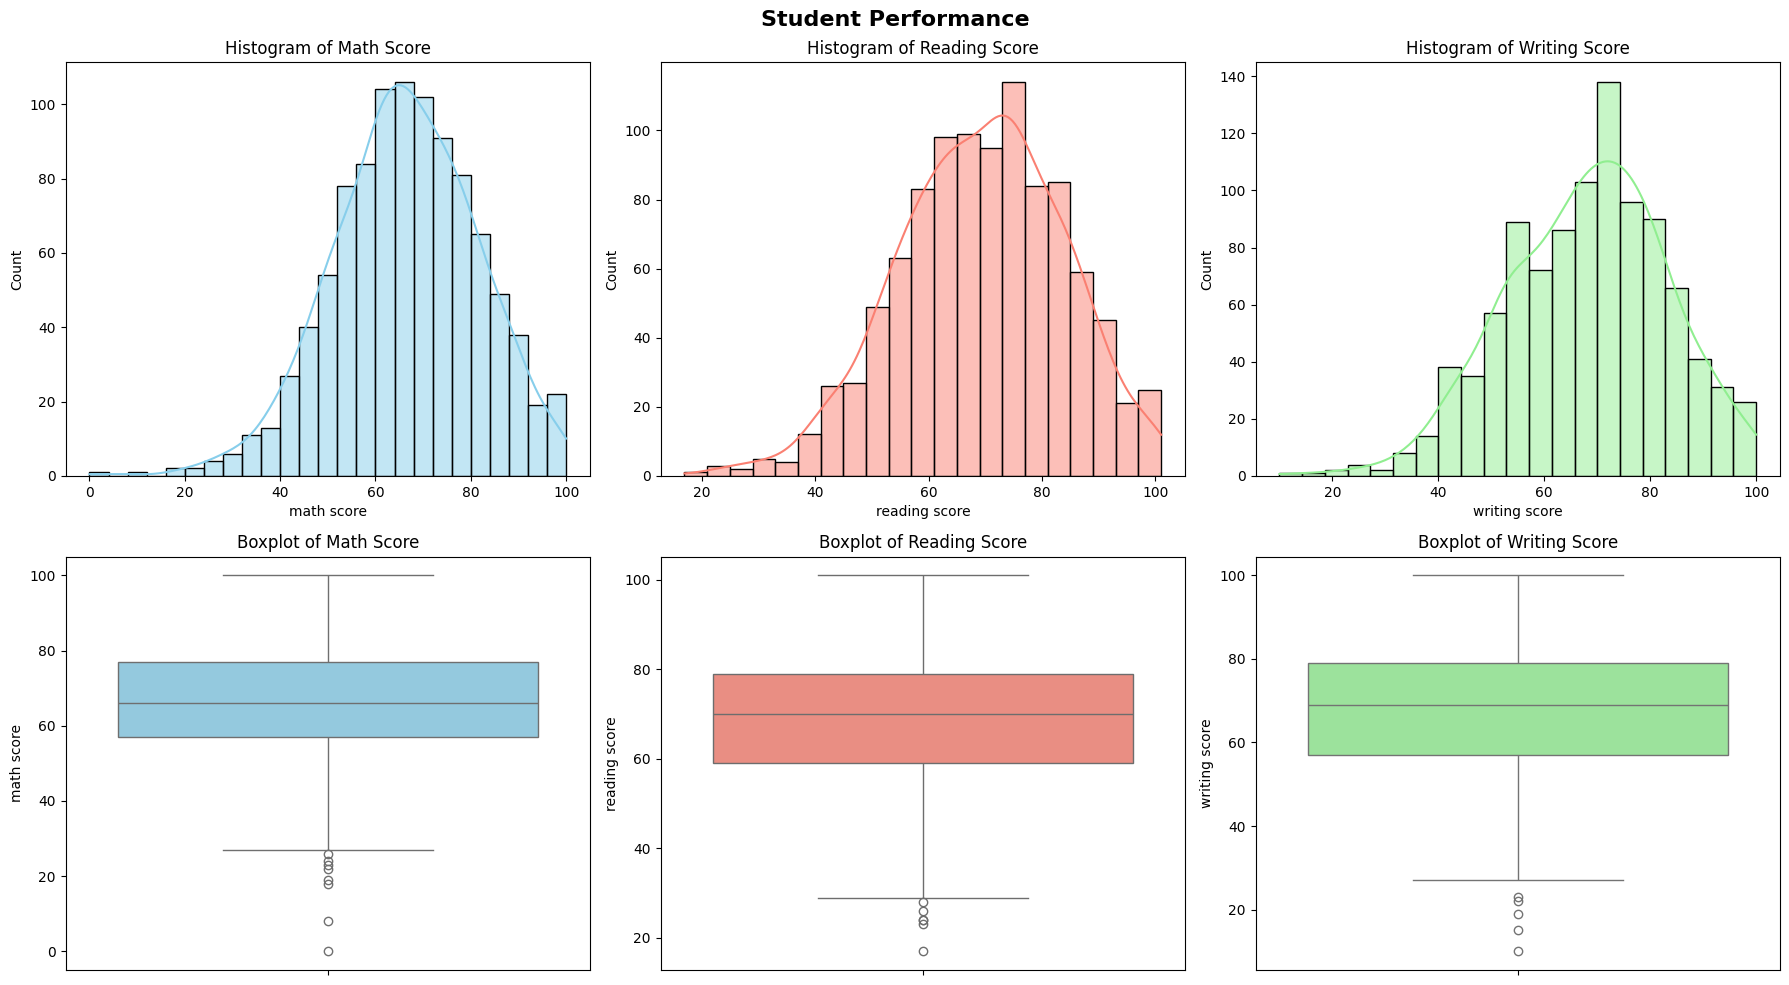

In [15]:
# Set up the figure and subplots with a 2x3 grid
plt.figure(figsize=(18, 10))

# Main title for the figure
plt.suptitle("Student Performance", fontsize=16, fontweight='bold')

# First Row: Histograms with different colors
plt.subplot(2, 3, 1)
sns.histplot(df['math score'], kde=True, color="skyblue")
plt.title('Histogram of Math Score')

plt.subplot(2, 3, 2)
sns.histplot(df['reading score'], kde=True, color="salmon")
plt.title('Histogram of Reading Score')

plt.subplot(2, 3, 3)
sns.histplot(df['writing score'], kde=True, color="lightgreen")
plt.title('Histogram of Writing Score')

# Second Row: Boxplots with different colors
plt.subplot(2, 3, 4)
sns.boxplot(y=df['math score'], color="skyblue")
plt.title('Boxplot of Math Score')

plt.subplot(2, 3, 5)
sns.boxplot(y=df['reading score'], color="salmon")
plt.title('Boxplot of Reading Score')

plt.subplot(2, 3, 6)
sns.boxplot(y=df['writing score'], color="lightgreen")
plt.title('Boxplot of Writing Score')

# Display all subplots in a single figure
plt.tight_layout()
plt.show()